## 기상청 데이터 
https://www.weather.go.kr/weather/lifenindustry/sevice_rss.jsp<br>
<br>
## 중앙일보 데이터
http://rss.joins.com/

In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

### 1. 중앙일보 데이터

In [28]:
j_url = 'https://rss.joins.com/joins_news_list.xml'

In [29]:
response = REQ.urlopen(j_url) # url을 open해서 response객체를 반환

In [30]:
soup = BeautifulSoup( response, 'html.parser' ) # html.parser / html5lib
# beautifulsoup으로 url읽어오기
# c데이터 있으면 html.parser사용하기
soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>중앙일보 | 전체기사</title>
<link/>http://joongang.joins.com
		<language>ko</language>
<copyright>Copyright by JoongAng Ilbo Co., Ltd. All Rights Reserved</copyright>
<pubdate>2020-12-28 오후 12:55:09</pubdate>
<lastbuilddate>2020-12-28 오후 12:55:09</lastbuilddate>
<description>중앙일보 - 현장의 진실을 중앙에 두다.</description>
<image/>
<title>중앙일보</title>
<url>https://images.joins.com/common/rss08/JoongAngIlbo_CI_Signature.png</url>
<link/>http://joongang.joins.com
			
		<item>
<title><![CDATA[유은혜 "대통령 비서실장설 현실성 없어…원격수업 질 높일것"]]></title>
<link/><![CDATA[https://news.joins.com/article/23956003?cloc=rss-news-total_list]]>
<description><![CDATA[유은혜 부총리 겸 교육부 장관. 연합뉴스“전국 거의 모든 학교가 원격수업을 제공할 수 있었던 것은 미래교육으로 나아가기 위한 소중하고 값진 경험이었다.” 유은혜 사회 부총리 겸 교육부 장관은 28일 오전 출입기자]]></description>
<author><![CDATA[남윤서 기자]]></author>
<pubdate>2020-12-28T12:54:22+09:00</pubdate>
</item>
<item>
<title><![CDATA[정청래 “‘윤석열 방지법’ 등장…집행정지신청 막는 법 만든다”]]></title>
<li

In [35]:
# soup.select('selector')
# 기사제목, 내용 가져오기
for item in soup.select('item'):
    print("타이틀: ",item.title.text ,'\n'
          "기사 내용: ", item.description.text ,'\n')

타이틀:  유은혜 "대통령 비서실장설 현실성 없어…원격수업 질 높일것" 
기사 내용:  유은혜 부총리 겸 교육부 장관. 연합뉴스“전국 거의 모든 학교가 원격수업을 제공할 수 있었던 것은 미래교육으로 나아가기 위한 소중하고 값진 경험이었다.” 유은혜 사회 부총리 겸 교육부 장관은 28일 오전 출입기자 

타이틀:  정청래 “‘윤석열 방지법’ 등장…집행정지신청 막는 법 만든다” 
기사 내용:  정 의원은 "집행정지 결정 신청이 본안소송 등의 실익을 해치고, 행정행위의 당사자에게 오히려 불이익이 발생하게 될 우려가 있는 경우 처분의 효력정지 신청을 허용하지 않도록 하는 것이 개정안 발의 이유다"고 설명했다. 정 의원은 이를 ‘윤석열 방지법’이라과 명명하면서 "버스 지난 후에 버스를 정지시켜봤자 무슨  

타이틀:  英 변이 코로나 비상…중대본 "관리 강화, 입국금지는 안한다" 
기사 내용:  국내서도 영국에서 유행 중인 신종 코로나바이러스 감염증(코로나19) 변이 바이러스에 감염된 첫 사례가 확인된 가운데 보건당국이 입국자 관리 강화 방안을 논의 중이다. 현재 영국과 남아프리카공화국 등 일부 고위험국가에서 들어오는 입국자에 대해 격리해제 전 검사를 의무화하고 있는데 이를 모든 입국자로 확대하 

타이틀:  명동 원조 곱돌비빔밥집도, 신촌 ‘복지탁구장’도 문 닫았다 
기사 내용:  서울시ㆍ중구 등에 따르면 이곳은 명동이라는 입지와 비빔밥이라는 메뉴 덕분에 외국인 손님이 70%를 차지했는데, 신종 코로나바이러스 감염증(코로나19) 여파로 관광객의 발길이 끊기면서 극심한 영업난에 시달렸다. 성태윤 연세대 경제학과 교수는 "코로나19 확산 이전부터 최저임금 인상과 경기부진 등으로 자영업자들의 

타이틀:  국민 60% "정경심 판결 합당하다"는데…판사탄핵 청원 40만 
기사 내용:  조국 전 법무부 장관의 부인 정경심 동양대 교수에 징역 4년을 선고한 법원의 판단에 국민 10명 중 6명은 합당한 판결이라고 생각하는 것으로 나타났다. 한국사회여론연구소(KSOI)가 지난 26

### 2. 기상청 데이터

In [36]:
w_url = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
response = REQ.urlopen(w_url)

In [45]:
w_url = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=159'
response = REQ.urlopen(w_url)    
soup = BeautifulSoup( response, 'html5lib' ) # html.parser / html5lib
soup

k_weather = [ ] 
for loc in soup.select('location'):
    for k in loc.find_all('data'): 
        k_weather.append({  '도시': loc.city.text,
                            '날짜': k.tmef.text,
                            '날씨': k.wf.text,
                            '최저': int( k.tmn.text ),
                            '최고': int( k.tmx.text ) 
                         })
kdf = pd.DataFrame( k_weather )     
Busan = k_weather
busan = kdf[ kdf['도시'] == '부산' ]

In [46]:
kdf

,도시,날짜,날씨,최저,최고
0,부산,2020-12-31 00:00,맑음,-7,3
1,부산,2020-12-31 12:00,맑음,-7,3
2,부산,2021-01-01 00:00,맑음,-4,4
3,부산,2021-01-01 12:00,맑음,-4,4
4,부산,2021-01-02 00:00,맑음,-2,6
...,...,...,...,...,...
255,하동,2021-01-04 00:00,구름많음,-3,8
256,하동,2021-01-04 12:00,구름많음,-3,8
257,하동,2021-01-05 00:00,구름많음,-3,5
258,하동,2021-01-06 00:00,맑음,-6,3


In [30]:
for i,v in busan.iterrows():
    print(v.날짜)
    print(v.날씨)
    print(v.최저)
    print(v.최고)

2020-12-31 00:00
맑음
-7
3
2020-12-31 12:00
맑음
-7
3
2021-01-01 00:00
맑음
-4
4
2021-01-01 12:00
맑음
-4
4
2021-01-02 00:00
맑음
-2
6
2021-01-02 12:00
맑음
-2
6
2021-01-03 00:00
구름많음
-1
8
2021-01-03 12:00
맑음
-1
8
2021-01-04 00:00
구름많음
1
8
2021-01-04 12:00
구름많음
1
8
2021-01-05 00:00
구름많음
-1
6
2021-01-06 00:00
맑음
-4
4
2021-01-07 00:00
맑음
-4
3


In [37]:
soup = BeautifulSoup( response, 'html5lib' ) # html.parser / html5lib
soup

<!--?xml version="1.0" encoding="utf-8" ?--><html><head></head><body><rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2020년 12월 28일 (월)요일 06:00</pubdate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2020년 12월 28일 (월)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
	<header>
		<title>서울,경기도 육상중기예보</title>
		<tm>202012280600</tm>
		<wf><!--[CDATA[○ (기온) 이번 예보기간 동안 아침 기온은 -17~-6도, 낮 기온은 -5~1도로 어제(27일, 아침 기온 -3~3도, 낮 기온 8~11도)보다 크게 낮아 매우 춥겠습니다. <br /-->          특히, 경기내륙을 중심으로 -15도 이하로 떨어지는 곳이 많겠으니, 시설물과 건강 관리에 유의하기 바랍니다.<br/>○ (해상) 서해중부해상의 물결은 31일(목)은 2.0~4.0m로 매우 높게 일겠고 바람도 매우 강하게 불겠으며, 다시 1월 5일(화)~6일(수)에 물결이 1.0~3.0m로 높게 일겠습니다. <br/>          그 밖의 날은 1.0~2.5m로 일겠습니다.<br/>○ (주

### 도시만 출력

In [68]:
for loc in soup.select('location'):
    print(loc.city.text)

서울
인천
수원
파주
이천
평택
백령도
과천
광명
강화
김포
시흥
안산
부천
의정부
고양
양주
동두천
연천
포천
가평
구리
남양주
양평
하남
안양
오산
화성
성남
의왕
군포
안성
용인
광주
여주


### 서울지역의 날짜, 날씨.. 구하기
- select() : list

In [130]:
for loc in soup.select('location'):
    print(loc.city.text)
    print('='*20)
    for k in loc.find_all('data'): # 위의 결과값이 리스트이기 때문에 for문 한 번 더 
        print('날짜: ', k.tmef.text)
        print('날씨: ', k.wf.text)
        print('최저: ', k.tmn.text)
        print('최고: ', k.tmx.text)
        print('-'*20)

서울
날짜:  2020-12-31 00:00
날씨:  맑음
최저:  -13
최고:  -5
--------------------
날짜:  2020-12-31 12:00
날씨:  맑음
최저:  -13
최고:  -5
--------------------
날짜:  2021-01-01 00:00
날씨:  맑음
최저:  -10
최고:  -2
--------------------
날짜:  2021-01-01 12:00
날씨:  맑음
최저:  -10
최고:  -2
--------------------
날짜:  2021-01-02 00:00
날씨:  맑음
최저:  -8
최고:  -1
--------------------
날짜:  2021-01-02 12:00
날씨:  맑음
최저:  -8
최고:  -1
--------------------
날짜:  2021-01-03 00:00
날씨:  맑음
최저:  -7
최고:  0
--------------------
날짜:  2021-01-03 12:00
날씨:  맑음
최저:  -7
최고:  0
--------------------
날짜:  2021-01-04 00:00
날씨:  맑음
최저:  -7
최고:  0
--------------------
날짜:  2021-01-04 12:00
날씨:  맑음
최저:  -7
최고:  0
--------------------
날짜:  2021-01-05 00:00
날씨:  맑음
최저:  -9
최고:  -3
--------------------
날짜:  2021-01-06 00:00
날씨:  맑음
최저:  -11
최고:  -4
--------------------
날짜:  2021-01-07 00:00
날씨:  맑음
최저:  -11
최고:  -4
--------------------
인천
날짜:  2020-12-31 00:00
날씨:  맑음
최저:  -11
최고:  -4
--------------------
날짜:  2020-12-31 12:00
날씨:  맑음
최저:  -11
최고:  -4
------

날짜:  2020-12-31 00:00
날씨:  맑음
최저:  -11
최고:  -3
--------------------
날짜:  2020-12-31 12:00
날씨:  맑음
최저:  -11
최고:  -3
--------------------
날짜:  2021-01-01 00:00
날씨:  맑음
최저:  -9
최고:  0
--------------------
날짜:  2021-01-01 12:00
날씨:  맑음
최저:  -9
최고:  0
--------------------
날짜:  2021-01-02 00:00
날씨:  맑음
최저:  -7
최고:  1
--------------------
날짜:  2021-01-02 12:00
날씨:  맑음
최저:  -7
최고:  1
--------------------
날짜:  2021-01-03 00:00
날씨:  맑음
최저:  -6
최고:  1
--------------------
날짜:  2021-01-03 12:00
날씨:  맑음
최저:  -6
최고:  1
--------------------
날짜:  2021-01-04 00:00
날씨:  맑음
최저:  -6
최고:  2
--------------------
날짜:  2021-01-04 12:00
날씨:  맑음
최저:  -6
최고:  2
--------------------
날짜:  2021-01-05 00:00
날씨:  맑음
최저:  -7
최고:  -1
--------------------
날짜:  2021-01-06 00:00
날씨:  맑음
최저:  -10
최고:  -2
--------------------
날짜:  2021-01-07 00:00
날씨:  맑음
최저:  -10
최고:  -3
--------------------
성남
날짜:  2020-12-31 00:00
날씨:  맑음
최저:  -12
최고:  -4
--------------------
날짜:  2020-12-31 12:00
날씨:  맑음
최저:  -12
최고:  -4
---------------

## 3. 2차원 구조로 형성

In [155]:
k_weather = [ ] 
for loc in soup.select('location'):
    for k in loc.find_all('data'): 
        k_weather.append({  '도시': loc.city.text,
                            '날짜': k.tmef.text,
                            '날씨': k.wf.text,
                            '최저': int( k.tmn.text ),
                            '최고': int( k.tmx.text ) 
                         })
k_weather_df = pd.DataFrame( k_weather )     
k_weather_df

,도시,날짜,날씨,최저,최고
0,서울,2020-12-31 00:00,맑음,-13,-5
1,서울,2020-12-31 12:00,맑음,-13,-5
2,서울,2021-01-01 00:00,맑음,-10,-2
3,서울,2021-01-01 12:00,맑음,-10,-2
4,서울,2021-01-02 00:00,맑음,-8,-1
...,...,...,...,...,...
450,여주,2021-01-04 00:00,맑음,-8,0
451,여주,2021-01-04 12:00,맑음,-8,0
452,여주,2021-01-05 00:00,맑음,-9,-1
453,여주,2021-01-06 00:00,맑음,-12,-3


### DataFrame.set_index( )
- 특정 컬럼을 인덱스로 설정
- 멀티 인덱스도 가능함

In [164]:
k_weather_df = k_weather_df.set_index(['도시','날짜'])

In [166]:
pd.set_option("display.max_rows", None)

## 4. 연습문제

1. 도시와 날짜를 인덱스로 설정하시요
2. 도시별 최고, 최저기온 평균을 구하시요.
3. '눈'이 오는 도시 날짜 날씨를 구하시요
4. 최저기온이 가장낮은 도시, 날짜, 최고기온
을 구하시요
5. 도시를 입력받아 해당도시 데이터를
구하시요
도시입력:
날짜  날씨 최고 	최저
....
6. 느낌 컬럼을 추가하고 최고기온이 -10 도 이하면: 매우 추움 -5~-9 면: 추움 나머지 : 보통 표시하시요
7. 서울지역의 날짜별 최고 최저기온을 바차트로
그리시요
8. 여주지역 최저기온이 -5 도 이하인데이터를 구하시요
9. 여주지역 전체 최고기온 중 최고기온이 5 도 이상이
차지하는비율을 구하시요.
(예를들어  출력결과:5도이상 15% )
10. 일교차 컬럼을 추가하고,최고기온과 최저기온의 
차이가 가장높은 도시,날짜,최저,최고,일교차를 구하시요

In [167]:
# 1. 도시와 날짜를 인덱스로 설정하시요
k_weather_df

날씨  최저  최고
도시  날짜                          
서울  2020-12-31 00:00  맑음 -13  -5
    2020-12-31 12:00  맑음 -13  -5
    2021-01-01 00:00  맑음 -10  -2
    2021-01-01 12:00  맑음 -10  -2
    2021-01-02 00:00  맑음  -8  -1
    2021-01-02 12:00  맑음  -8  -1
    2021-01-03 00:00  맑음  -7   0
    2021-01-03 12:00  맑음  -7   0
    2021-01-04 00:00  맑음  -7   0
    2021-01-04 12:00  맑음  -7   0
    2021-01-05 00:00  맑음  -9  -3
    2021-01-06 00:00  맑음 -11  -4
    2021-01-07 00:00  맑음 -11  -4
인천  2020-12-31 00:00  맑음 -11  -4
    2020-12-31 12:00  맑음 -11  -4
    2021-01-01 00:00  맑음  -9  -2
    2021-01-01 12:00  맑음  -9  -2
    2021-01-02 00:00  맑음  -7  -1
    2021-01-02 12:00  맑음  -7  -1
    2021-01-03 00:00  맑음  -6   0
    2021-01-03 12:00  맑음  -6   0
    2021-01-04 00:00  맑음  -6   0
    2021-01-04 12:00  맑음  -6   0
    2021-01-05 00:00  맑음  -8  -3
    2021-01-06 00:00  맑음  -9  -4
    2021-01-07 00:00  맑음  -9  -3
수원  2020-12-31 00:00  맑음 -13  -4
    2020-12-31 12:00  맑음 -13  -4
    2021-01-01 00:00  맑음 -10  -2
    2021-01-01 12:00  맑음 -10  -2
    2021-01-02 00:00  맑음  -8   0
    2021-01-02 12:00  맑음  -8   0
    2021-01-03 00:00  맑음  -8   1
    2021-01-03 12:00  맑음  -8   1
    2021-01-04 00:00  맑음  -7   0
    2021-01-04 12:00  맑음  -7   0
    2021-01-05 00:00  맑음  -9  -2
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -10  -3
파주  2020-12-31 00:00  맑음 -17  -5
    2020-12-31 12:00  맑음 -17  -5
    2021-01-01 00:00  맑음 -15  -3
    2021-01-01 12:00  맑음 -15  -3
    2021-01-02 00:00  맑음 -13  -1
    2021-01-02 12:00  맑음 -13  -1
    2021-01-03 00:00  맑음 -13  -2
    2021-01-03 12:00  맑음 -13  -2
    2021-01-04 00:00  맑음 -13  -2
    2021-01-04 12:00  맑음 -13  -2
    2021-01-05 00:00  맑음 -12  -3
    2021-01-06 00:00  맑음 -15  -4
    2021-01-07 00:00  맑음 -15  -4
이천  2020-12-31 00:00  맑음 -14  -4
    2020-12-31 12:00  맑음 -14  -4
    2021-01-01 00:00  맑음 -12  -2
    2021-01-01 12:00  맑음 -12  -2
    2021-01-02 00:00  맑음 -10   0
    2021-01-02 12:00  맑음 -10   0
    2021-01-03 00:00  맑음 -10   0
    2021-01-03 12:00  맑음 -10   0
    2021-01-04 00:00  맑음 -10  -1
    2021-01-04 12:00  맑음 -10  -1
    2021-01-05 00:00  맑음 -11  -2
    2021-01-06 00:00  맑음 -12  -3
    2021-01-07 00:00  맑음 -13  -3
평택  2020-12-31 00:00  맑음 -12  -3
    2020-12-31 12:00  맑음 -12  -3
    2021-01-01 00:00  맑음  -9   0
    2021-01-01 12:00  맑음  -9   0
    2021-01-02 00:00  맑음  -7   1
    2021-01-02 12:00  맑음  -7   1
    2021-01-03 00:00  맑음  -7   0
    2021-01-03 12:00  맑음  -7   0
    2021-01-04 00:00  맑음  -7  -1
    2021-01-04 12:00  맑음  -7  -1
    2021-01-05 00:00  맑음  -8  -2
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -10  -3
백령도 2020-12-31 00:00  맑음  -7  -4
    2020-12-31 12:00  맑음  -7  -4
    2021-01-01 00:00  맑음  -5  -2
    2021-01-01 12:00  맑음  -5  -2
    2021-01-02 00:00  맑음  -5   1
    2021-01-02 12:00  맑음  -5   1
    2021-01-03 00:00  맑음  -2   0
    2021-01-03 12:00  맑음  -2   0
    2021-01-04 00:00  맑음  -4  -1
    2021-01-04 12:00  맑음  -4  -1
    2021-01-05 00:00  맑음  -4  -1
    2021-01-06 00:00  맑음  -6  -1
    2021-01-07 00:00  맑음  -5  -2
과천  2020-12-31 00:00  맑음 -13  -4
    2020-12-31 12:00  맑음 -13  -4
    2021-01-01 00:00  맑음 -10   0
    2021-01-01 12:00  맑음 -10   0
    2021-01-02 00:00  맑음  -8   1
    2021-01-02 12:00  맑음  -8   1
    2021-01-03 00:00  맑음  -7   1
    2021-01-03 12:00  맑음  -7   1
    2021-01-04 00:00  맑음  -7   2
    2021-01-04 12:00  맑음  -7   2
    2021-01-05 00:00  맑음  -8  -1
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -11  -4
광명  2020-12-31 00:00  맑음 -11  -4
    2020-12-31 12:00  맑음 -11  -4
    2021-01-01 00:00  맑음  -8   0
    2021-01-01 12:00  맑음  -8   0
    2021-01-02 00:00  맑음  -7   1
    2021-01-02 12:00  맑음  -7   1
    2021-01-03 00:00  맑음  -6   1
    2021-01-03 12:00  맑음  -6   1
    2021-01-04 00:00  맑음  -5   1
    2021-01-04 12:00  맑음  -5   1
    2021-01-05 00:00  맑음  -7  -1
    2021-01-06 00:00  맑음  -9  -3
    2021-01-07 00:00  맑음 -11  -6
강화  2020-12-31 00:00  맑음 -14  -5
    2020-12-31 12:00  맑음 -14  -5
    2021-01-01 00:00  맑음 -12 

In [172]:
# 2. 도시별 최고, 최저기온 평균을 구하시요.
k_weather_df.pivot_table( index='도시' ).sort_index()
# k_weather_df.groupby('도시', sort=False).mean() # 자동으로 정렬되어 나온다.

,최고,최저
도시,,
가평,-1.000000,-13.923077
강화,-2.307692,-10.923077
고양,-0.846154,-10.692308
과천,-0.615385,-9.230769
광명,-0.923077,-7.769231
광주,-1.076923,-10.384615
구리,-0.384615,-9.076923
군포,-1.000000,-8.384615
김포,-0.692308,-9.384615


In [196]:
k_weather_df.info() # 숫자형 타입만 정렬되어 나온다

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 455 entries, ('서울', '2020-12-31 00:00') to ('여주', '2021-01-07 00:00')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날씨      455 non-null    object
 1   최저      455 non-null    int64 
 2   최고      455 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.0+ KB


In [195]:
# 3. '눈'이 오는 도시 날짜 날씨를 구하시요
k_weather_df[ k_weather_df['날씨'].str.contains('눈') ]

,,날씨,최저,최고
도시,날짜,,,


In [193]:
# 4. 최저기온이 가장낮은 도시, 날짜, 최고기온을 구하시요
k_weather_df.nsmallest( 1, columns='최저', keep='all' )

날씨  최저  최고
도시 날짜                          
연천 2020-12-31 00:00  맑음 -18  -6
   2020-12-31 12:00  맑음 -18  -6
가평 2020-12-31 00:00  맑음 -18  -4
   2020-12-31 12:00  맑음 -18  -4

# 5. 
- 도시를 입력받아 해당도시 데이터를 구하시요 도시입력: 날짜 날씨 최고 최저 ....
- 인덱스로 슬라이싱, 인덱싱
###    - loc/iloc!!! ###

In [261]:
city = input('도시를 입력하세요: ').strip()
k_weather_df.loc[city]

도시를 입력하세요: 여주


,날씨,최저,최고,느낌
날짜,,,,
2020-12-31 00:00,맑음,-14,-4,매우 추움
2020-12-31 12:00,맑음,-14,-4,매우 추움
2021-01-01 00:00,맑음,-11,-2,매우 추움
2021-01-01 12:00,맑음,-11,-2,매우 추움
2021-01-02 00:00,맑음,-9,1,추움
2021-01-02 12:00,맑음,-9,1,추움
2021-01-03 00:00,맑음,-7,1,추움
2021-01-03 12:00,맑음,-7,1,추움
2021-01-04 00:00,맑음,-8,0,추움


# 6. 
- 느낌 컬럼을 추가하고 최고기온이 
- -10 도 이하면: 매우 추움
- -5~-9 면: 추움
- 나머지 : 보통
- 표시하시요

In [257]:
def fn(x):
    if x <= -10:
        return '매우 추움'
    elif (x >= -9) & (x <= -5):
        return '추움'
    else:
        return '보통'

In [260]:
k_weather_df['느낌'] = k_weather_df['최저'].apply(fn)
k_weather_df

날씨  최저  최고     느낌
도시  날짜                                 
서울  2020-12-31 00:00  맑음 -13  -5  매우 추움
    2020-12-31 12:00  맑음 -13  -5  매우 추움
    2021-01-01 00:00  맑음 -10  -2  매우 추움
    2021-01-01 12:00  맑음 -10  -2  매우 추움
    2021-01-02 00:00  맑음  -8  -1     추움
    2021-01-02 12:00  맑음  -8  -1     추움
    2021-01-03 00:00  맑음  -7   0     추움
    2021-01-03 12:00  맑음  -7   0     추움
    2021-01-04 00:00  맑음  -7   0     추움
    2021-01-04 12:00  맑음  -7   0     추움
    2021-01-05 00:00  맑음  -9  -3     추움
    2021-01-06 00:00  맑음 -11  -4  매우 추움
    2021-01-07 00:00  맑음 -11  -4  매우 추움
인천  2020-12-31 00:00  맑음 -11  -4  매우 추움
    2020-12-31 12:00  맑음 -11  -4  매우 추움
    2021-01-01 00:00  맑음  -9  -2     추움
    2021-01-01 12:00  맑음  -9  -2     추움
    2021-01-02 00:00  맑음  -7  -1     추움
    2021-01-02 12:00  맑음  -7  -1     추움
    2021-01-03 00:00  맑음  -6   0     추움
    2021-01-03 12:00  맑음  -6   0     추움
    2021-01-04 00:00  맑음  -6   0     추움
    2021-01-04 12:00  맑음  -6   0     추움
    2021-01-05 00:00  맑음  -8  -3     추움
    2021-01-06 00:00  맑음  -9  -4     추움
    2021-01-07 00:00  맑음  -9  -3     추움
수원  2020-12-31 00:00  맑음 -13  -4  매우 추움
    2020-12-31 12:00  맑음 -13  -4  매우 추움
    2021-01-01 00:00  맑음 -10  -2  매우 추움
    2021-01-01 12:00  맑음 -10  -2  매우 추움
    2021-01-02 00:00  맑음  -8   0     추움
    2021-01-02 12:00  맑음  -8   0     추움
    2021-01-03 00:00  맑음  -8   1     추움
    2021-01-03 12:00  맑음  -8   1     추움
    2021-01-04 00:00  맑음  -7   0     추움
    2021-01-04 12:00  맑음  -7   0     추움
    2021-01-05 00:00  맑음  -9  -2     추움
    2021-01-06 00:00  맑음 -11  -3  매우 추움
    2021-01-07 00:00  맑음 -10  -3  매우 추움
파주  2020-12-31 00:00  맑음 -17  -5  매우 추움
    2020-12-31 12:00  맑음 -17  -5  매우 추움
    2021-01-01 00:00  맑음 -15  -3  매우 추움
    2021-01-01 12:00  맑음 -15  -3  매우 추움
    2021-01-02 00:00  맑음 -13  -1  매우 추움
    2021-01-02 12:00  맑음 -13  -1  매우 추움
    2021-01-03 00:00  맑음 -13  -2  매우 추움
    2021-01-03 12:00  맑음 -13  -2  매우 추움
    2021-01-04 00:00  맑음 -13  -2  매우 추움
    2021-01-04 12:00  맑음 -13  -2  매우 추움
    2021-01-05 00:00  맑음 -12  -3  매우 추움
    2021-01-06 00:00  맑음 -15  -4  매우 추움
    2021-01-07 00:00  맑음 -15  -4  매우 추움
이천  2020-12-31 00:00  맑음 -14  -4  매우 추움
    2020-12-31 12:00  맑음 -14  -4  매우 추움
    2021-01-01 00:00  맑음 -12  -2  매우 추움
    2021-01-01 12:00  맑음 -12  -2  매우 추움
    2021-01-02 00:00  맑음 -10   0  매우 추움
    2021-01-02 12:00  맑음 -10   0  매우 추움
    2021-01-03 00:00  맑음 -10   0  매우 추움
    2021-01-03 12:00  맑음 -10   0  매우 추움
    2021-01-04 00:00  맑음 -10  -1  매우 추움
    2021-01-04 12:00  맑음 -10  -1  매우 추움
    2021-01-05 00:00  맑음 -11  -2  매우 추움
    2021-01-06 00:00  맑음 -12  -3  매우 추움
    2021-01-07 00:00  맑음 -13  -3  매우 추움
평택  2020-12-31 00:00  맑음 -12  -3  매우 추움
    2020-12-31 12:00  맑음 -12  -3  매우 추움
    2021-01-01 00:00  맑음  -9   0     추움
    2021-01-01 12:00  맑음  -9   0     추움
    2021-01-02 00:00  맑음  -7   1     추움
    2021-01-02 12:00  맑음  -7   1     추움
    2021-01-03 00:00  맑음  -7   0     추움
    2021-01-03 12:00  맑음  -7   0     추움
    2021-01-04 00:00  맑음  -7  -1     추움
    2021-01-04 12:00  맑음  -7  -1     추움
    2021-01-05 00:00  맑음  -8  -2     추움
    2021-01-06 00:00  맑음 -11  -3  매우 추움
    2021-01-07 00:00  맑음 -10  -3  매우 추움
백령도 2020-12-31 00:00  맑음  -7  -4     추움
    2020-12-31 12:00  맑음  -7  -4     추움
    2021-01-01 00:00  맑음  -5  -2     추움
    2021-01-01 12:00  맑음  -5  -2     추움
    2021-01-02 00:00  맑음  -5   1     추움
    2021-01-02 12:00  맑음  -5   1     추움
    2021-01-03 00:00  맑음  -2   0     보통
    2021-01-03 12:00  맑음  -2   0     보통
    2021-01-04 00:00  맑음  -4  -1     보통
    2021-01-04 12:00  맑음  -4  -1     보통
    2021-01-05 00:00  맑음  -4  -1     보통
    2021-01-06 00:00  맑음  -6  -1     추움
    2021-01-07 00:00  맑음  -5  -2     추움
과천  2020-12-31 00:00  맑음 -13  -4  매우 추움
    2020-12-31 12:00  맑음 -13  -4  매우 추움
    2021-01-01 00:00  맑음 -10   0  매우 추움
    2021-01-01 12:00  맑음 -10   0  매우 추움
    2021-01-02 00:00  맑음  -8   1     추움
    2021-01-02 12:00  맑음  -8   1     추움
    2021-01-03 00:00  맑음  -7   1     추움
    2021-01-03 12:00  

# 7. 
- 서울지역의 날짜별 최고 최저기온을 바차트로 그리시요

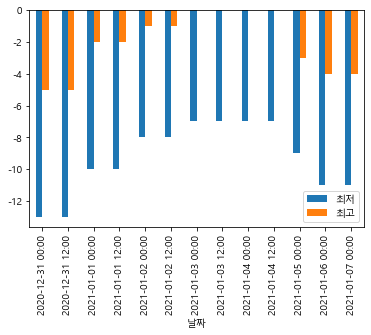

In [266]:
k_weather_df.loc['서울'].plot( kind='bar')
plt.show()

# 8. 
- 여주지역 최저기온이 -10 도 이하인데이터를 구하시요

In [291]:
k_weather_df.loc['여주'][ (k_weather_df.loc['여주']['최저'] <= - 10) ]

,날씨,최저,최고,느낌,일교차
날짜,,,,,
2020-12-31 00:00,맑음,-14,-4,매우 추움,10
2020-12-31 12:00,맑음,-14,-4,매우 추움,10
2021-01-01 00:00,맑음,-11,-2,매우 추움,9
2021-01-01 12:00,맑음,-11,-2,매우 추움,9
2021-01-06 00:00,맑음,-12,-3,매우 추움,9
2021-01-07 00:00,맑음,-12,-3,매우 추움,9


In [309]:
k_weather_df.loc['여주'].query( '최저 <= -10' )

,날씨,최저,최고,느낌,일교차
날짜,,,,,
2020-12-31 00:00,맑음,-14,-4,매우 추움,10
2020-12-31 12:00,맑음,-14,-4,매우 추움,10
2021-01-01 00:00,맑음,-11,-2,매우 추움,9
2021-01-01 12:00,맑음,-11,-2,매우 추움,9
2021-01-06 00:00,맑음,-12,-3,매우 추움,9
2021-01-07 00:00,맑음,-12,-3,매우 추움,9


# 9.
- 여주지역 전체 최고기온 중 최고기온이 0 도 이상이
- 차지하는비율을 구하시요.
- (예를들어  출력결과:5도이상 15% )

In [315]:
# Sol(1): query 사용
over_zero = k_weather_df.loc['여주'].query( '0 <= 최고')['최고'].count()
total     = k_weather_df.loc['여주']['최고'].count()
print(f'0도 이상: {( (over_zero/total)*100 ).round(2)}%')

0도 이상: 46.15%


In [316]:
# Sol(2): boolean indexing을 사용
over_zero = k_weather_df.loc['여주'][ k_weather_df.loc['여주']['최고'] >= 0 ]['최고'].count()
total     = k_weather_df.loc['여주']['최고'].count()
print(f'0도 이상: {( (over_zero/total)*100 ).round(2)}%')

0도 이상: 46.15%


### len( )사용시 주의할 점
- len( )은 **null**도 포함한다.
- null이 있을 땐 count( )사용하는게 맞다

In [ ]:
# 10. 일교차 컬럼을 추가하고,최고기온과 최저기온의 
# 차이가 가장높은 도시,날짜,최저,최고,일교차를 구하시요

In [306]:
k_weather_df['일교차'] = k_weather_df['최고'] - k_weather_df['최저']
k_weather_df.nlargest( 1, columns='일교차', keep='all')

날씨  최저  최고     느낌  일교차
도시 날짜                                      
가평 2020-12-31 00:00  맑음 -18  -4  매우 추움   14
   2020-12-31 12:00  맑음 -18  -4  매우 추움   14
   2021-01-02 00:00  맑음 -13   1  매우 추움   14
   2021-01-02 12:00  맑음 -13   1  매우 추움   14